# Simulation S0. Random Forest

In [127]:
R.version
library(tidyverse)
library(randomForest)

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          3                           
minor          5.3                         
year           2019                        
month          03                          
day            11                          
svn rev        76217                       
language       R                           
version.string R version 3.5.3 (2019-03-11)
nickname       Great Truth                 

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




### Configuration

In [120]:
data_path = "./data/simulation/s0"
path_genus = "./data/genus48"
count_path = 'data/simulation/count/'

y_path = sprintf('%s/%s', data_path, 'y.csv')
tree_info_path = './data/genus48/genus48_dic.csv'
count_path = './data/simulation/count'
count_list_path = './data/simulation/gcount_list.csv'
idx_path = './data/simulation/s0/idx.csv'

num_classes = 0 # regression
tree_level_list = c('Genus', 'Family', 'Order', 'Class', 'Phylum')

In [162]:
# # Read phylogenetic tree information

# phylogenetic_tree_info = read.csv(tree_info_path)
# phylogenetic_tree_info = phylogenetic_tree_info %>% select(tree_level_list)

# print(sprintf('Phylogenetic tree level list: %s', str_c(phylogenetic_tree_info %>% colnames, collapse = ', ')))

### Read dataset

In [96]:
read_dataset <- function(x_path, y_path, sim){
    print(str_c('Load data for repetition ', sim))
    x = read.csv(x_path)
    y = read.csv(y_path)[,sim]
    x = (x - max(x)) / (max(x) - min(x))

    idxs = idxs_total[, sim]
    remain_idxs = setdiff(seq(1, dim(x)[1]), idxs)

    x_train = x[idxs,]
    x_test = x[remain_idxs,]
    y_train = y[idxs]
    y_test = y[remain_idxs]
    
    return (list(x_train, x_test, y_train, y_test))
}

In [91]:
idxs_total = read.csv(idx_path)
number_of_fold = dim(idxs_total)[2]; number_of_fold
x_list = read.csv(count_list_path, header = FALSE)
x_path = x_list$V1 %>% sprintf('%s/%s', count_path, .)

[1] 1000

## Random Forest

### TODO

1. set `mtry` from 48 genus 
1. Random Forest with Feature Selection

In [178]:
set.seed(100)
fold = 1
dataset = read_dataset(x_path[fold], y_path, fold)
x_train = dataset[[1]]
x_test = dataset[[2]]
y_train = dataset[[3]]
y_test = dataset[[4]]

fit.rf <- randomForest(y_train~.,data=x_train, ntree=1000,  mtry=10)
train.pred <- fit.rf$predicted
test.pred <- predict(fit.rf,x_test)

train.mse <- mean((y_train - train.pred)^2)
train.cor <- cor(y_train, train.pred)
print(sprintf('Train mse: %s, Train Correlation: %s', train.mse, train.cor))

test.cor <- cor(y_test, test.pred)
test.mse <- mean((y_test - test.pred)^2)
print(sprintf('Test mse: %s, Test Correlation: %s', test.mse, test.cor))

[1] "Load data for repetition 1"
[1] "Train mse: 0.032349665895835, Train Correlation: 0.965925836699227"
[1] "Test mse: 0.058298639153035, Test Correlation: 0.88090071805761"


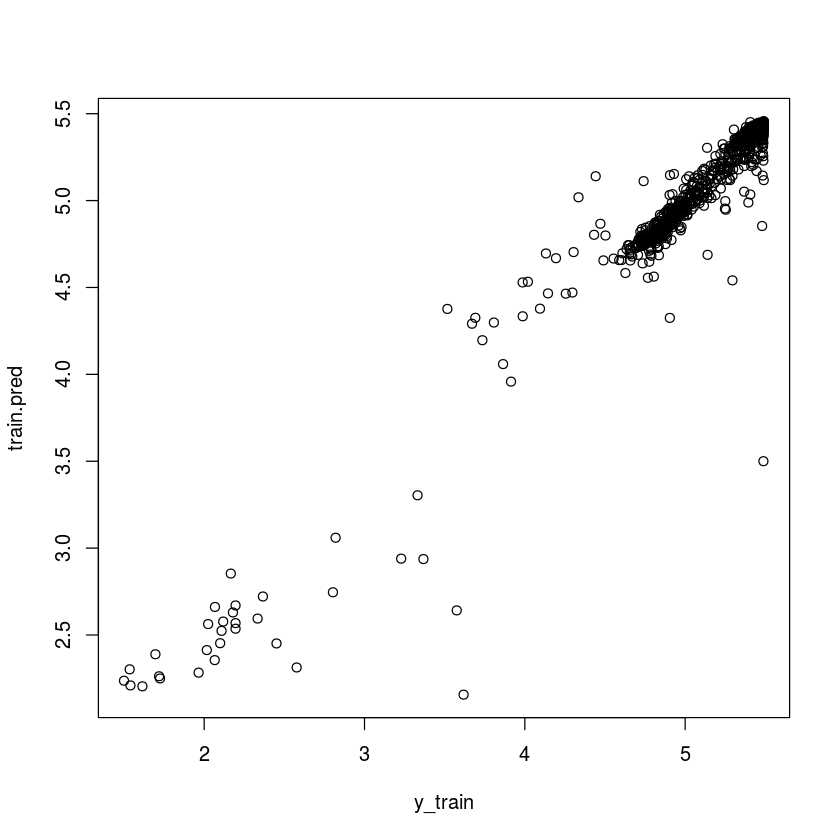

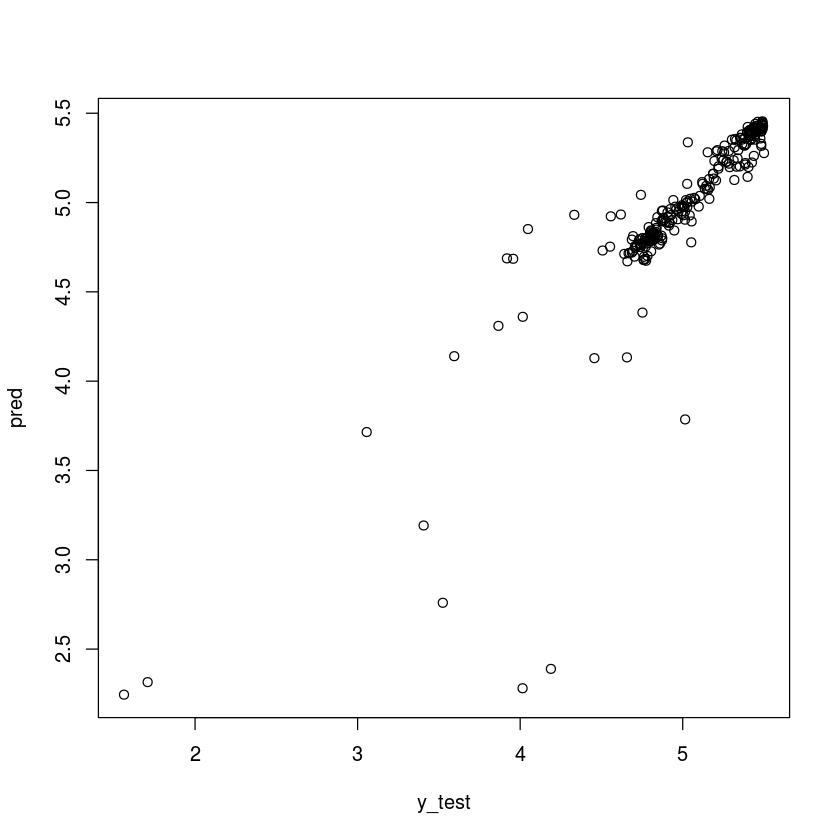

In [177]:
plot(y_train, train.pred)
plot(y_test, pred)

### Simulate for all $n$

In [182]:
random_forest_res <- function(fold){
    dataset = read_dataset(x_path[fold], y_path, fold)
    x_train = dataset[[1]]
    x_test = dataset[[2]]
    y_train = dataset[[3]]
    y_test = dataset[[4]]

    fit.rf <- randomForest(y_train~.,data=x_train, ntree=1000,  mtry=10)
    train.pred <- fit.rf$predicted
    test.pred <- predict(fit.rf,x_test)

    train.mse <- mean((y_train - train.pred)^2)
    train.cor <- cor(y_train, train.pred)
    print(sprintf('-----------------------------------------------------------------'))
    print(sprintf('Random Forest computation for %dth repetition', fold))
    print(sprintf('Train mse: %s, Train Correlation: %s', train.mse, train.cor))

    test.cor <- cor(y_test, test.pred)
    test.mse <- mean((y_test - test.pred)^2)
    print(sprintf('Test mse: %s, Test Correlation: %s', test.mse, test.cor))    
    return (c(train.mse, train.cor, test.mse, test.cor))
}

In [188]:
set.seed(100)
res <- sapply(seq(1,10), random_forest_res)

[1] "Load data for repetition 1"
[1] "-----------------------------------------------------------------"
[1] "Random Forest computation for 1th repetition"
[1] "Train mse: 0.0614033092801083, Train Correlation: 0.954956095778726"
[1] "Test mse: 0.0594391884653157, Test Correlation: 0.874716407858127"
[1] "Load data for repetition 2"
[1] "-----------------------------------------------------------------"
[1] "Random Forest computation for 2th repetition"
[1] "Train mse: 0.0782647039160406, Train Correlation: 0.905355203569631"
[1] "Test mse: 0.0809153475542727, Test Correlation: 0.962954164414091"
[1] "Load data for repetition 3"
[1] "-----------------------------------------------------------------"
[1] "Random Forest computation for 3th repetition"
[1] "Train mse: 0.075115253787798, Train Correlation: 0.936554941305461"
[1] "Test mse: 0.0480063285697441, Test Correlation: 0.87181097419111"
[1] "Load data for repetition 4"
[1] "----------------------------------------------------------

In [227]:
results_table = res %>% t %>% data.frame
colnames(results_table) = c('Training MSE', 'Training Correlation', 'Test MSE', 'Test Correlation')
results_table

Training MSE,Training Correlation,Test MSE,Test Correlation
0.06140331,0.9549561,0.8747164,0.05943919
0.07826470,0.9053552,0.9629542,0.08091535
0.07511525,0.9365549,0.8718110,0.04800633
0.06863472,0.9245373,0.9435956,0.01693339
0.07356811,0.9045412,0.9269104,0.06298080
0.05919722,0.9386973,0.8920900,0.04688963
0.07996735,0.9245735,0.8894555,0.03326177
0.06157482,0.9385407,0.8565288,0.10257427
0.08169932,0.8941771,0.9660130,0.07826250
0.05635253,0.8969349,0.8917129,0.11749435


In [229]:
apply(results_table, 2, mean)

Training MSE Training Correlation             Test MSE 
          0.06957773           0.92188682           0.90757877 
    Test Correlation 
          0.06467576

In [230]:
apply(results_table, 2, sd)

Training MSE Training Correlation             Test MSE 
         0.009376958          0.020676099          0.039352220 
    Test Correlation 
         0.030849290

### Summarize

|                                   | Testing |       |             |       | Training |       |             |       |
|-----------------------------------|:-------:|-------|-------------|-------|:--------:|-------|-------------|-------|
| Method                            |   MSE   |       | Correlation |       |    MSE   |       | Correlation |       |
|                                   | mean    | sd    | mean        | sd    | mean     | sd    | mean        | sd    |
| Linear Regression                 | 0.104   | 0.024 | 0.824       | 0.049 | 0.087    | 0.011 | 0.851       | 0.023 |
| Ridge                             | 0.104   | 0.022 | 0.824       | 0.049 | 0.09     | 0.012 | 0.851       | 0.023 |
| Lasso                             | 0.100   | 0.023 | 0.833       | 0.048 | 0.092    | 0.013 | 0.843       | 0.025 |
| Elastic Net                       | 0.100   | 0.023 | 0.833       | 0.048 | 0.092    | 0.012 | 0.844       | 0.025 |
| Random Forest                     |         |       |             |       |          |       |             |       |
| Random Forest + Feature Selection |         |       |             |       |          |       |             |       |
| DNN                               | 0.076   | 0.040 | 0.874       | 0.077 | 0.032    | 0.034 | 0.947       | 0.067 |
| DNN+$\ell_1$                      | 0.075   | 0.040 | 0.875       | 0.073 | 0.034    | 0.039 | 0.945       | 0.068 |
| DeepBiome                         | 0.071   | 0.036 | 0.882       | 0.069 | 0.043    | 0.034 | 0.929       | 0.061 |

## TODO: Feature selection
#### The variable importance plot

In [149]:
(VI_F=importance(fit.rf))

,IncNodePurity
Streptococcus,5.6975811
Tropheryma,83.2086087
Veillonella,7.8255639
Actinomyces,6.6281992
Flavobacterium,3.0900329
Prevotella,5.1546348
Porphyromonas,26.5425985
Parvimonas,4.7940545
Fusobacterium,5.8135518
Propionibacterium,3.0809211


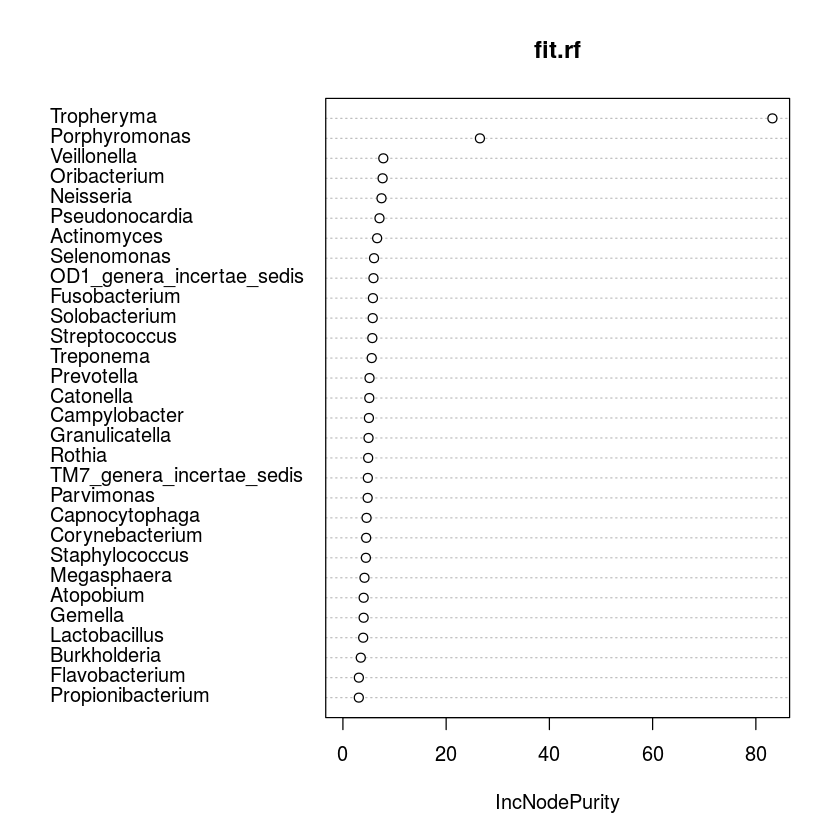

In [151]:
varImpPlot(fit.rf,type=2)